In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
pd.set_option('display.max_columns', 100)

import nltk
from scipy import stats
import re
from  scipy.stats import ttest_ind
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Import file with cleaned comments and engineerd features.

In [2]:
data=pd.read_csv('Data/cleanedData.csv')
data.dropna(subset=['CleanWordList'],inplace=True)
data.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,%OfUpperCaseLetters,NoOfURL,AvgLengthOfEachWord,%OfNoOfStopWords,NoOfWords,%OfNoOfUniqueWords,AvgSentenceLength,TextStandard,CleanWordList
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,1.79,0,6.12,32.14,13,1.000,8.0,3.0,huh anyway check tube channel kobyoshi99
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,12.05,0,4.22,26.51,40,0.775,15.0,6.0,hey guy check new channel first vid u monkey '...


# Vectorize Text

In [103]:
# X=data['CleanWordList']
X=data.iloc[:,5:]
y=data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25 ,random_state=147)

countVectorizer=CountVectorizer(min_df=5,ngram_range=(1,3))

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)


In [104]:
# Create document term matrix for training and testing data
X_train_dtm = countVectorizer.fit_transform(X_train['CleanWordList']) 
X_test_dtm  = countVectorizer.transform(X_test['CleanWordList'])

In [105]:
# convert training document term matrix to a dataframe
colName=countVectorizer.get_feature_names()
colName=sorted(colName,reverse=True)

X_train_dtm=pd.DataFrame(X_train_dtm.toarray(),columns=colName)

# Add other rest of the features from train dataset to X_train_dtm
X_train_dtm=pd.concat([X_train_dtm,X_train.iloc[:,:-1]], axis=1, sort=False)
X_train_dtm

zonepa com visit  zonepa com make  zonepa com check  zonepa com  zonepa  \
0                    1                0                 0           1       0   
1                    0                0                 0           0       0   
2                    0                0                 0           0       0   
3                    0                0                 0           0       0   
4                    0                0                 0           0       0   
5                    3                1                 0           0       1   
6                    0                0                 0           0       0   
7                    0                0                 0           0       0   
8                    0                0                 0           0       0   
9                    0                0                 0           0       0   
10                   2                0                 0           1       0   
11                   0                0                 0           0       0   
12                   0                0                 0           0       0   
13                   0                0                 0           0       0   
14                   0                0                 0           0       0   
15                   0                0                 0           0       0   
16                   0                0                 0           0       0   
17                   0                0                 0           0       0   
18                   0                0                 0           0       0   
19                   0                0                 0           0       0   
20                   1                0                 0           0       0   
21                   0                0                 0           0       0   
22                   0                0                 0           0       0   
23                   0                0                 0           0       0   
24                   1                0                 0           0       0   
25                   0                0                 0           0       0   
26                   0                0                 0           0       0   
27                   0                0                 0           0       0   
28                   0                0                 0           0       0   
29                   1                0                 0           0       0   
...                ...              ...               ...         ...     ...   
1399                 0                0                 0           0       0   
1400                 1                0                 0           0       0   
1401                 0                0                 0           0       0   
1402                 0                0                 0           0       0   
1403                 0                0                 0           0       0   
1404                 0                0                 0           0       0   
1405                 0                0                 0           0       0   
1406                 0                0                 0           0       0   
1407                 0                0                 0           0       0   
1408                 0                0                 0           0       0   
1409                 1                0                 0           0       0   
1410                 0                0                 0           0       0   
1411                 0                0                 0           0       0   
1412                 0                0                 0           0       0   
1413                 0                0                 0           0       0   
1414                 0                0                 0           0       0   
1415                 0                0                 0           0       0   
1416                 0               

limit_output extension: Maximum message size of 10000 exceeded with 111675 characters

In [106]:
# convert test document term matrix to a dataframe
X_test_dtm=pd.DataFrame(X_test_dtm.toarray(),columns=colName)

# Add other rest of the features from test dataset to X_test_dtm
X_test_dtm=pd.concat([X_test_dtm,X_test.iloc[:,:-1]], axis=1, sort=False)

X_test_dtm

zonepa com visit  zonepa com make  zonepa com check  zonepa com  zonepa  \
0                   0                0                 0           0       0   
1                   0                0                 0           0       0   
2                   0                0                 0           0       0   
3                   0                0                 0           0       0   
4                   0                0                 0           0       0   
5                   0                0                 0           0       0   
6                   4                1                 1           0       0   
7                   0                0                 0           0       0   
8                   0                0                 0           0       0   
9                   0                0                 0           0       0   
10                  0                0                 0           0       0   
11                  0                0                 0           0       0   
12                  1                0                 0           0       0   
13                  0                0                 0           0       0   
14                  0                0                 0           0       0   
15                  0                0                 0           0       0   
16                  0                0                 0           0       0   
17                  0                0                 0           0       0   
18                  0                0                 0           0       0   
19                  0                0                 0           0       0   
20                  0                0                 0           0       0   
21                  0                0                 0           0       0   
22                  0                0                 0           0       0   
23                  0                0                 0           0       0   
24                  0                0                 0           0       0   
25                  0                0                 0           0       0   
26                  0                0                 0           0       0   
27                  0                0                 0           0       0   
28                  0                0                 0           0       0   
29                  0                0                 0           0       0   
..                ...              ...               ...         ...     ...   
447                 0                0                 0           0       0   
448                 0                0                 0           0       0   
449                 0                0                 0           0       0   
450                 0                0                 0           0       0   
451                 0                0                 0           0       0   
452                 0                0                 0           0       0   
453                 0                0                 0           0       0   
454                 0                0                 0           0       0   
455                 0                0                 0           0       0   
456                 0                0                 0           0       0   
457                 2                1                 0           0       0   
458                 1                0                 0           0       0   
459                 0                0                 0           0       0   
460                 2                0                 0           0       0   
461                 0                0                 0           0       0   
462                 0                0                 0           0       0   
463                 0                0                 0           0       0   
464                 0                0                 0           0       0   
465  

limit_output extension: Maximum message size of 10000 exceeded with 111633 characters

In [107]:
#Initialize clasifier
clf=MultinomialNB()
clf.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [108]:
predict = clf.predict(X_test_dtm)

In [109]:
print("Vocab size:",len(countVectorizer.get_feature_names()))

Vocab size: 729


The vocab size is 729 and we can see that unigrams, bi-grams and tri-grams are part of the document matrix.

# Find most predictive words for Spam and Ham comments.

In [110]:
words = np.array(countVectorizer.get_feature_names())
x = np.eye(X_test_dtm.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

In [111]:
predictors_of_SPAM = words[ind[:20]]
predictors_of_HAM = words[ind[-20:]]

SPAM_prob = probs[ind[:20]]
HAM_prob = probs[ind[-20:]]

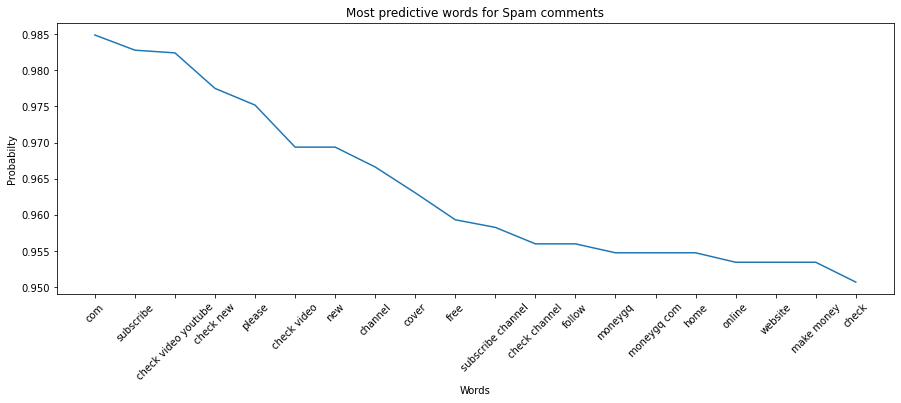

In [112]:
df_spamPredictors=pd.DataFrame(zip(predictors_of_SPAM,(1 - np.exp(SPAM_prob))),
             columns=['Most predictive words for Spam comments','Probabilty'])


sns.lineplot(x='Most predictive words for Spam comments',y='Probabilty',data=df_spamPredictors,sort=False)
plt.title("Most predictive words for Spam comments")
plt.xlabel("Words")
plt.xticks(rotation=45);


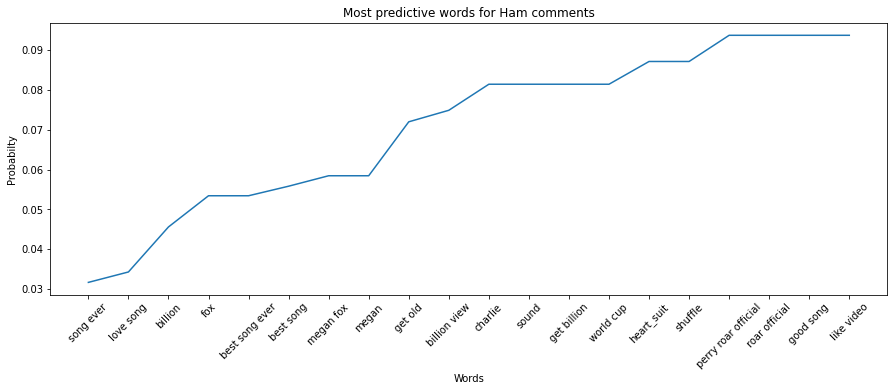

In [113]:
df_hamPredictors=pd.DataFrame(zip(predictors_of_HAM,(1 - np.exp(HAM_prob))),
             columns=['Most predictive words for Ham comments','Probabilty'])

df_hamPredictors.sort_values(by=['Probabilty'], ascending=True, inplace=True)
sns.lineplot(x='Most predictive words for Ham comments',y='Probabilty',data=df_hamPredictors,sort=False)
plt.title("Most predictive words for Ham comments")
plt.xlabel("Words")
plt.xticks(rotation=45);

# Find mis-predicted comments from both categories.

In [114]:
prob = clf.predict_log_proba(X_test_dtm)[:, 0]


In [115]:
X_test['CleanWordList'].shape

(477,)

In [116]:
y_test.shape

(477,)

In [117]:
predict.shape

(477,)

In [118]:
prob.shape

(477,)

In [119]:
y_test.reset_index(drop=True,inplace=True)

In [120]:
cols={'Comment':X_test['CleanWordList'],
      'Class':y_test,
      'Prediction':predict,
       'Probability':prob 
     }
temp=pd.DataFrame(cols)
temp.head()

,Comment,Class,Prediction,Probability
0,psy get lots money youtube get 9 billion view ...,0,0,-0.000255
1,super,0,0,-0.000024
2,like comment type 9999,1,0,-0.000159
3,check video youtube,1,1,-0.968895
4,check video youtube,1,1,-0.968895


In [121]:
filt=temp['Class']!=temp['Prediction']
filt0=temp['Class']==0
filt1=temp['Class']==1
print("Spam comments misclassified as ham","\n-------------------------------------------")
for i in range(5):
    print(u'\u2022',temp[filt & filt1].Comment.iloc[i], '\n')

print("\n\nHam comments misclassified as spam","\n-------------------------------------------")
for i in range(5):
    print(u'\u2022',temp[filt & filt0].Comment.iloc[i], '\n')


Spam comments misclassified as ham 
-------------------------------------------
• like comment type 9999 

• check playlist 

• check melbourne shuffle everybody 

• like roblox minecraft world warcraft gta9 mario suscribe channel 

• please throw sub channel 



Ham comments misclassified as spam 
-------------------------------------------
• hay honesty wright 99year old love song thank makeing song love song much sometime hart get breaken people kill self go cazzy love much thanks face_screaming_in_fearclapping_handskeep go make sure dream comeing rule good luck 

• honest opinion 's mediocre song nothing unique special music lyric voice nothing memorable like billie jean beat million fan reply hate comment know democracy people free see want n't right express opinion please n't reply dumb comment lie `` n't like n't watch '' come see 's buzz 999 million view n't like saw ok 

• gu song one worst fear life someone abusive tower live ... 

• p e c e amp l v e 

• make five year ago p

# Classification Report

In [122]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       238
           1       0.89      0.71      0.79       239

    accuracy                           0.81       477
   macro avg       0.83      0.81      0.81       477
weighted avg       0.83      0.81      0.81       477



In [123]:
report = classification_report(y_test, predict, output_dict=True)
pd.DataFrame(report).transpose()

,f1-score,precision,recall,support
0,0.830476,0.759582,0.915966,238.000000
1,0.792541,0.894737,0.711297,239.000000
accuracy,0.813417,0.813417,0.813417,0.813417
macro avg,0.811508,0.827159,0.813632,477.000000
weighted avg,0.811469,0.827301,0.813417,477.000000
